In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Convert Image to Mask

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define paths
base_image_path = "/content/drive/MyDrive/BaseMap.png"  # Path to the base image
segmented_images_path = "/content/drive/MyDrive/satellite"  # Path to the folder containing segmented images
output_masks_path = "/content/drive/MyDrive/satellite_masks"  # Path to save the generated masks

In [ ]:
# Load the base image
base_image = cv2.imread(base_image_path)

# Verify base image load
if base_image is None:
    print(f"Base image not found at {base_image_path}")
else:
    print(f"Base Image Metadata:")
    print(f" - Shape: {base_image.shape}")  # (Height, Width, Channels)
    print(f" - Channels: {base_image.shape[2] if len(base_image.shape) == 3 else 1}")
    print(f" - Data Type: {base_image.dtype}")
    print(f" - Path: {base_image_path}\n")

Base Image Metadata:
 - Shape: (748, 1680, 3)
 - Channels: 3
 - Data Type: uint8
 - Path: /content/drive/MyDrive/BaseMap.png



In [ ]:
# Process each segmented image
segmented_image_files = [f for f in os.listdir(segmented_images_path) if f.endswith('.png')]

if not segmented_image_files:
    print("No segmented images found in the specified path.")
else:
    print("Segmented Images Metadata:\n")
    for segmented_image_file in segmented_image_files:
        # Load the segmented image
        segmented_image_path = os.path.join(segmented_images_path, segmented_image_file)
        segmented_image = cv2.imread(segmented_image_path)

        # Verify the segmented image
        if segmented_image is None:
            print(f" - {segmented_image_file}: Unable to load the image.")
            continue

        # Print image metadata
        print(f" - Image: {segmented_image_file}")
        print(f"   - Shape: {segmented_image.shape}")
        print(f"   - Channels: {segmented_image.shape[2] if len(segmented_image.shape) == 3 else 1}")
        print(f"   - Data Type: {segmented_image.dtype}")
        print(f"   - Path: {segmented_image_path}\n")
        break

Segmented Images Metadata:

 - Image: 2012_1_11.png
   - Shape: (748, 1680, 3)
   - Channels: 3
   - Data Type: uint8
   - Path: /content/drive/MyDrive/satellite/2012_1_11.png



In [ ]:
# Create output directory if it doesn't exist
os.makedirs(output_masks_path, exist_ok=True)

In [ ]:
# Step 1: Load the Base Image
base_image = cv2.imread(base_image_path)

# Verify the base image
if base_image is None:
    raise ValueError(f"Base image not found at {base_image_path}")
print("Base image loaded successfully.")

Base image loaded successfully.


In [ ]:
from tqdm import tqdm

In [ ]:
# List all segmented image files
segmented_image_files = [f for f in os.listdir(segmented_images_path) if f.endswith('.png')]

if not segmented_image_files:
    raise ValueError("No segmented images found in the specified path.")

# Use tqdm to create a progress bar
for segmented_image_file in tqdm(segmented_image_files, desc="Processing Images", unit="file"):
    # Load the segmented image
    segmented_image_path = os.path.join(segmented_images_path, segmented_image_file)
    segmented_image = cv2.imread(segmented_image_path)

    # Verify the segmented image
    if segmented_image is None:
        print(f"Skipping {segmented_image_file}: Unable to load the image.")
        continue

    # Ensure the segmented image and base image have the same shape
    if segmented_image.shape != base_image.shape:
        print(f"Skipping {segmented_image_file}: Image size mismatch.")
        continue

    # Compute pixel-wise difference (direct comparison, no abs)
    difference = base_image - segmented_image

    # Create a mask with black as default
    mask = np.zeros_like(segmented_image)  # Initialize with black

    # Apply condition: If difference is equal to zero, assign black, otherwise retain color from segmented image
    mask[np.any(difference != 0, axis=-1)] = segmented_image[np.any(difference != 0, axis=-1)]

    # Save the mask
    mask_output_path = os.path.join(output_masks_path, f"mask_{segmented_image_file}")

    cv2.imwrite(mask_output_path, mask)
print("All masks have been processed and saved.")

Processing Images: 100%|██████████| 462/462 [01:19<00:00,  5.81file/s]

All masks have been processed and saved.


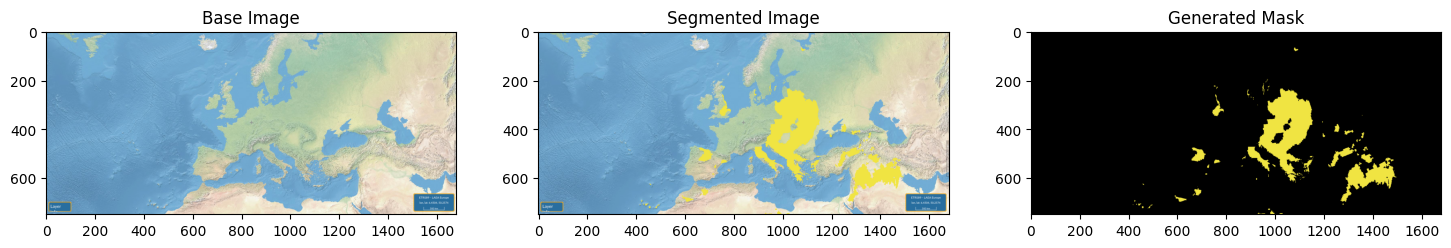

In [ ]:
# Step 3: Verify a Few Masks
sample_segmented_image = cv2.imread(os.path.join(segmented_images_path, segmented_image_files[0]))
sample_mask = cv2.imread(os.path.join(output_masks_path, f"mask_{segmented_image_files[0]}"))

plt.figure(figsize=(18, 15))
plt.subplot(1, 3, 1)
plt.title("Base Image")
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Segmented Image")
plt.imshow(cv2.cvtColor(sample_segmented_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Generated Mask")
plt.imshow(cv2.cvtColor(sample_mask, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
def get_distinct_colors(image_path):
    """
    Get distinct RGB colors in an image, sorted in descending order.

    Parameters:
        image_path (str): Path to the image.

    Returns:
        List of tuples: Distinct RGB colors sorted in descending order.
    """
    # Load the image in BGR format
    image = cv2.imread(image_path)

    # Verify the image
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image_rgb.reshape(-1, 3)

    # Find unique rows (RGB values)
    unique_colors = np.unique(pixels, axis=0)

    # Convert to list of tuples and sort by descending sum of RGB values
    distinct_colors = sorted(
        [tuple(color) for color in unique_colors],
        key=lambda x: sum(x),
        reverse=True
    )

    return distinct_colors

In [ ]:
# Example usage
mask_path = f"{output_masks_path}/mask_2012_1_21.png"  # Replace with your mask file
distinct_colors = get_distinct_colors(mask_path)
print("Distinct RGB values in the mask:")
for color in distinct_colors:
    print(color)

Distinct RGB values in the mask:
(240, 228, 66)
(230, 159, 0)
(220, 5, 12)
(0, 0, 0)


In [ ]:
mask_path

'/content/drive/MyDrive/satellite_masks/mask_2012_1_21.png'

In [ ]:
# Process each segmented image
segmented_image_files = [f for f in os.listdir(output_masks_path) if f.endswith('.png')]

if not segmented_image_files:
    print("No segmented images found in the specified path.")
else:
    print("Segmented Images Metadata:\n")
    for segmented_image_file in segmented_image_files:
        # Load the segmented image
        segmented_image_path = os.path.join(output_masks_path, segmented_image_file)
        segmented_image = cv2.imread(segmented_image_path)

        # Verify the segmented image
        if segmented_image is None:
            print(f" - {segmented_image_file}: Unable to load the image.")
            continue

        # Print image metadata
        print(f" - Image: {segmented_image_file}")
        print(f"   - Shape: {segmented_image.shape}")
        print(f"   - Channels: {segmented_image.shape[2] if len(segmented_image.shape) == 3 else 1}")
        print(f"   - Data Type: {segmented_image.dtype}")
        print(f"   - Path: {segmented_image_path}\n")
        break

Segmented Images Metadata:

 - Image: mask_2012_1_11.png
   - Shape: (748, 1680, 3)
   - Channels: 3
   - Data Type: uint8
   - Path: /content/drive/MyDrive/satellite_masks/mask_2012_1_11.png



# Construct the dataset

In [ ]:
import os
import shutil
from datetime import datetime

In [ ]:
# Output directory for the dataset
output_dataset_dir = "/content/drive/MyDrive/dataset"
images_dir = os.path.join(output_dataset_dir, "images")
masks_dir = os.path.join(output_dataset_dir, "masks")
timestamps_dir = os.path.join(output_dataset_dir, "timestamps")

# Create directories if they do not exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(masks_dir, exist_ok=True)
os.makedirs(timestamps_dir, exist_ok=True)

In [ ]:
# 1. Copy the base image to the 'images' folder
shutil.copy(base_image_path, images_dir)

# 2. Process each mask image in the output_masks_path
mask_files = [f for f in os.listdir(output_masks_path) if f.endswith('.png')]
for mask_file in mask_files:
    mask_path = os.path.join(output_masks_path, mask_file)

    # 2.1. Copy the mask to the 'masks' folder
    shutil.copy(mask_path, masks_dir)

    # 2.2. Extract date from the mask filename (assuming filename is like 'mask_2024_2_11.png')
    parts = mask_file.split('_')  # Split the filename by underscores
    if len(parts) >= 4:
        # Reassemble the date in 'YYYY-MM-DD' format, and remove the .png part from the filename
        mask_date_str = f"{parts[1]}-{parts[2]}-{parts[3].split('.')[0]}"  # Remove .png part

        # Debugging: Print the filename and extracted date part
        print(f"Processing {mask_file}, extracted date part: {mask_date_str}")

        try:
            # Validate and format the date (assuming 'YYYY-MM-DD' format)
            mask_date = datetime.strptime(mask_date_str, "%Y-%m-%d")
            timestamp_filename = f"{mask_date.strftime('%Y-%m-%d')}.txt"

            # 2.3. Write timestamp to the 'timestamps' folder
            timestamp_path = os.path.join(timestamps_dir, timestamp_filename)
            with open(timestamp_path, 'w') as f:
                f.write(mask_date.strftime('%Y-%m-%d'))  # You can write more information if needed
        except ValueError as e:
            print(f"Error processing {mask_file}: {e}")
            # Optionally, continue or skip the file
    else:
        print(f"Skipping {mask_file}: Filename format unexpected.")

print("Dataset structure has been created successfully.")

# Model Training

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [ ]:
# Define color mapping: Yellow -> 1, Red -> 2, Orange -> 3, Background -> 0 (Black)
color_mapping = {
    (240, 228, 66): 1,  # Yellow
    (220, 5, 12): 2,    # Red
    (230, 159, 0): 3,     # Orange
    (0, 0, 0): 0         # Black (Background)
}

In [ ]:
class TemporalSegmentationDataset(Dataset):
    def __init__(self, base_image_path, mask_images_path, timestamps_path, transform=None):
        """
        Initializes the dataset.

        :param base_image_path: Path to the static base image.
        :param mask_images_path: Path to the folder containing the mask images.
        :param timestamps_path: Path to the folder containing timestamp files.
        :param transform: Transform to apply to the images and masks (optional).
        """
        self.base_image = cv2.imread(base_image_path)  # Static base image
        self.mask_images = sorted(os.listdir(mask_images_path))  # List of mask images sorted by date
        self.timestamps = sorted(os.listdir(timestamps_path))  # List of timestamps sorted by date
        self.mask_images_path = mask_images_path
        self.timestamps_path = timestamps_path
        self.transform = transform

    def __len__(self):
        return len(self.mask_images)

    def __getitem__(self, idx):
        """
        Returns the input (base image + mask) and the corresponding label (segmented regions).
        """
        # Load the mask image
        mask_image_path = os.path.join(self.mask_images_path, self.mask_images[idx])
        mask = cv2.imread(mask_image_path)

        # Convert mask to class labels based on color mapping
        mask_label = np.zeros(mask.shape[:2], dtype=np.uint8)  # Initialize with background (0)

        for color, label in color_mapping.items():
            mask_label[np.all(mask == color, axis=-1)] = label  # Assign label based on color

        # Stack the base image with the mask to form the input sequence (base_image + mask)
        input_image = np.concatenate([self.base_image, mask], axis=-1)  # Concatenate base and mask images

        # If you have a transform, apply it here
        if self.transform:
            input_image = self.transform(input_image)
            mask_label = self.transform(mask_label)

        return input_image, mask_label

In [ ]:
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(UNet, self).__init__()

        # Encoder (downsampling)
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder (upsampling)
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, output_channels, kernel_size=3, padding=1),
            nn.Softmax(dim=1)  # For multi-class segmentation
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

In [ ]:
# Initialize dataset and dataloader
dataset = TemporalSegmentationDataset(
    base_image_path='/content/drive/MyDrive/dataset/images/BaseMap.png',
    mask_images_path='/content/drive/MyDrive/dataset/masks',
    timestamps_path='/content/drive/MyDrive/dataset/timestamps'
)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
# Initialize the model, criterion, and optimizer
model = UNet(input_channels=6, output_channels=4)  # 6 channels (Base + Mask), 4 classes
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()  # For multi-class segmentation

In [ ]:
# Training loop
num_epochs = 20

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in dataloader:
        # Convert inputs to float32 and normalize to [0, 1] if needed
        inputs = inputs.float()  # Convert to float32

        # Normalize inputs if necessary (if you want to normalize to [0, 1])
        # inputs = inputs / 255.0  # Uncomment if needed (for pixel range 0-255)

        # Convert labels to long (int64) for CrossEntropyLoss
        labels = labels.long()

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)  # Model output

        # Calculate loss
        loss = criterion(outputs, labels)  # Calculate loss

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")

In [ ]:
# Testing loop
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for inputs, labels in dataloader:
        outputs = model(inputs)  # Model output

        # Convert outputs to class labels
        _, predicted = torch.max(outputs, 1)

        # You can visualize the output or calculate metrics (e.g., accuracy, IoU)
        # Visualize or calculate evaluation metrics here